In [16]:
%load_ext autoreload
%autoreload 2

import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import data_strings
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import data_extraction.get_indices as get_indices
import analysis.trajectory_efficiency as trajectory_efficiency
import analysis.player_scores as player_scores

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Calculate trajectory efficiency ratios for each player in a session, for all sessions, and separating wins from losses

In [8]:
data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL

In [9]:
json_filenames = json_filenames_all_social

In [10]:
_, trial_lists = prepare_data.prepare_data(data_folder, data_strings.JSON_FILENAMES_SOCIAL, combine=False)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fifth_experiments_241112\2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\sixth_experiments_241112\2024-11-12_15-23-24_Franc

In [ ]:
(ratio_player_0_win, ratio_player_0_loss, ratio_player_1_win, ratio_player_1_loss) = trajectory_efficiency.ratio_direct_to_absolute_distances_session(trial_lists[0])

(np.float64(0.8180543609037378),
 np.float64(0.7526065258454677),
 np.float64(0.7695818626503675),
 np.float64(0.6271476309674597))

In [ ]:
ratio_player_0_win, ratio_player_0_loss, ratio_player_1_win, ratio_player_1_loss

In [12]:
trajectory_efficiency_ratios = trajectory_efficiency.ratio_direct_to_absolute_distances_multiple_sessions(trial_lists)

d:\tom\documents\swc\repos\octagon_analysis\analysis\trajectory_efficiency.py:145: RuntimeWarning: invalid value encountered in divide
  ratio_player_0_loss =  np.nanmean(player_0_loss_direct_distances/player_0_loss_actual_distances)
d:\tom\documents\swc\repos\octagon_analysis\analysis\trajectory_efficiency.py:144: RuntimeWarning: invalid value encountered in divide
  ratio_player_0_win =  np.nanmean(player_0_win_direct_distances/player_0_win_actual_distances)
d:\tom\documents\swc\repos\octagon_analysis\analysis\trajectory_efficiency.py:147: RuntimeWarning: invalid value encountered in divide
  ratio_player_1_loss =  np.nanmean(player_1_loss_direct_distances/player_1_loss_actual_distances)
d:\tom\documents\swc\repos\octagon_analysis\analysis\trajectory_efficiency.py:146: RuntimeWarning: invalid value encountered in divide
  ratio_player_1_win = np.nanmean(player_1_win_direct_distances/player_1_win_actual_distances)


In [13]:
trajectory_efficiency_ratios

array([[0.81805436, 0.75260653, 0.76958186, 0.62714763],
       [0.8528626 , 0.74524714, 0.97358384, 0.97010905],
       [0.80857126, 0.75096426, 0.96135905, 0.93467841],
       [0.91968453, 0.76394457, 0.97535918, 0.92923553],
       [0.73610489, 0.70538151, 0.8661736 , 0.86554128],
       [0.91374202, 0.84900348, 0.88118037, 0.84936182],
       [0.93627636, 0.92750364, 0.95772683, 0.94869054],
       [0.94167449, 0.94123678, 0.80581444, 0.70804739],
       [0.87646966, 0.82234305, 0.85116921, 0.58362716],
       [0.88844501, 0.8352379 , 0.77381439, 0.76717592],
       [0.9787667 , 0.96694637, 0.78405313, 0.6277685 ],
       [0.89376756, 0.924481  , 0.98079487, 0.98913242]])

In [17]:
proportion_score_array = player_scores.proportion_score_sessions_df(trial_lists)

In [18]:
proportion_score_array

array([[0.42406312, 0.57593688],
       [0.37438424, 0.62561576],
       [0.42009132, 0.57990868],
       [0.33567416, 0.66432584],
       [0.37628866, 0.62371134],
       [0.79399142, 0.20600858],
       [0.492569  , 0.507431  ],
       [0.38533835, 0.61466165],
       [0.32718894, 0.67281106],
       [0.78571429, 0.21428571],
       [0.24919094, 0.75080906],
       [0.29604131, 0.70395869]])

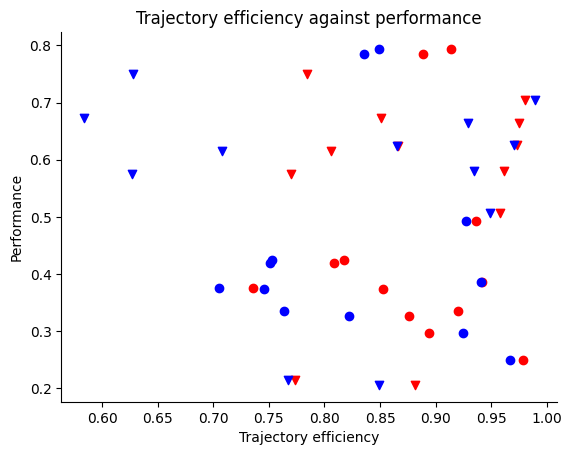

In [21]:

plt.scatter(trajectory_efficiency_ratios[:,0], proportion_score_array[:,0], marker="o",  color='r')
plt.scatter(trajectory_efficiency_ratios[:,1], proportion_score_array[:,0], marker="o",  color='b')


plt.scatter(trajectory_efficiency_ratios[:,2], proportion_score_array[:,1], marker="v",  color='r')
plt.scatter(trajectory_efficiency_ratios[:,3], proportion_score_array[:,1], marker="v",  color='b')


plt.title("Trajectory efficiency against performance")
plt.xlabel("Trajectory efficiency")
plt.ylabel("Performance")

# Remove top and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)